[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


# EDA:

* Visualize at least two quantitative variables and two categorical variables. Your visualizations must be relevant to the research questions!
* Describe any trends you observe, and any relationships you may want to follow up on.
* Describe any data cleaning steps you took. How will these decisions impact your models and
inferences?
* Explain how your visualizations should be relevant to your research questions: either by motivating the question, or suggesting a potential answer. You must explain why they are relevant.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import math

import matplotlib.pyplot as plt

In [2]:
from google.colab import files
# https://www.kaggle.com/datasets/jameslko/gun-violence-data?resource=download
# Run on Google Chrome to select the csv file in your local computer (should be 'gun-violence-data_01-2013_03-2018.csv')
uploaded = files.upload()

Saving gun-violence-data_01-2013_03-2018.csv to gun-violence-data_01-2013_03-2018.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['gun-violence-data_01-2013_03-2018.csv']))
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

In [4]:
# https://www.census.gov/data/datasets/time-series/demo/popest/2010s-total-cities-and-towns.html#ds (1st table)
# Run on Google Chrome to select the csv file in your local computer (should be 'city_population_total_2010_2019.csv')
uploaded_2 = files.upload()

Saving city_population_total_2010_2019.csv to city_population_total_2010_2019.csv


In [5]:
# Dataframe of City Populations by Year
df_2 = pd.read_csv(io.BytesIO(uploaded_2['city_population_total_2010_2019.csv']))
df_2

,Rank,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,"New York city, New York","8,175,133","8,175,031","8,190,209","8,272,948","8,346,693","8,396,091","8,433,806","8,463,049","8,469,153","8,437,478","8,390,081","8,336,817"
1,2,"Los Angeles city, California","3,792,621","3,793,139","3,795,512","3,820,876","3,851,202","3,881,622","3,909,901","3,938,568","3,963,226","3,975,788","3,977,596","3,979,576"
2,3,"Chicago city, Illinois","2,695,598","2,695,652","2,697,477","2,708,114","2,719,141","2,725,731","2,727,066","2,724,344","2,716,723","2,711,069","2,701,423","2,693,976"
3,4,"Houston city, Texas","2,099,451","2,095,517","2,100,280","2,126,032","2,161,593","2,199,391","2,241,826","2,286,908","2,309,544","2,316,750","2,318,573","2,320,268"
4,5,"Phoenix city, Arizona","1,445,632","1,446,691","1,449,038","1,469,796","1,499,274","1,526,491","1,555,445","1,583,690","1,612,199","1,633,560","1,654,675","1,680,992"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,784,"Lakewood city, Ohio","52,131","52,131","52,026","51,662","51,400","51,257","51,088","50,811","50,528","50,211","50,012","49,678"
784,785,"Troy city, New York","50,129","50,162","50,081","50,020","49,848","49,921","49,968","49,776","49,597","49,433","49,354","49,154"
785,786,"Saginaw city, Michigan","51,508","51,469","51,363","51,012","50,728","50,272","49,798","49,230","48,902","48,696","48,310","48,115"
786,787,"Niagara Falls city, New York","50,193","50,031","49,996","49,760","49,526","49,328","49,083","48,769","48,526","48,249","48,012","47,720"


In [6]:
# https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html (1st table)
# Run on Google Chrome to select the csv file in your local computer (should be 'state_population_total_2010_2019.csv')
uploaded_3 = files.upload()

Saving state_population_total_2010_2019.csv to state_population_total_2010_2019.csv


In [7]:
# Dataframe of State Populations by Year
df_3 = pd.read_csv(io.BytesIO(uploaded_3['state_population_total_2010_2019.csv']))
df_3

,Geographic Area,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,Alaska,710231,710249,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,Arizona,6392017,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,Arkansas,2915918,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,California,37253956,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
5,Colorado,5029196,5029319,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736
6,Connecticut,3574097,3574147,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287
7,Delaware,897934,897937,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764
8,District of Columbia,601723,601767,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749
9,Florida,18801310,18804564,18845537,19053237,19297822,19545621,19845911,20209042,20613477,20963613,21244317,21477737


In [8]:
# https://github.com/jakevdp/data-USstates/blob/master/state-areas.csv
# Use wget to receive dataset from above github

# Dataframe of land area of each state (to calculate state population density for later)
!wget https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
state_areas = "state-areas.csv"
df_4 = pd.read_csv(state_areas)
df_4

--2022-04-29 18:13:25--  https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 835 [text/plain]
Saving to: ‘state-areas.csv’

state-areas.csv     100%[===================>]     835  --.-KB/s    in 0s      

2022-04-29 18:13:25 (29.2 MB/s) - ‘state-areas.csv’ saved [835/835]



,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707
5,Colorado,104100
6,Connecticut,5544
7,Delaware,1954
8,Florida,65758
9,Georgia,59441


In [ ]:
# If we're going to be looking at differences in differences,
# we need to have a treatment group (aka Pennsylvania for our Act 192)
# and a control group (aka New Jersey due to its proximity to Philadelphia, Pennsylvania).
# Time 1: 2014, Time 2: 2016

# We'll be making the same line graph of instances over years
# and bar graphs of most populated cities' instances
# but comparing between Penn. and NJ

In [9]:
# Cleaning #1: Adding 'year' column to help keep track of gun violence over year
df['datetime'] = pd.to_datetime(df["date"])
df['year'] = pd.DatetimeIndex(df['datetime']).year

In [10]:
# Cleaning #2: Cleaning up geography name and replacing with 'city' and 'state' columns for city population
city = []
state = []
for i in df_2['Geographic Area'].values:
  area = i.split(" city, ")
  city.append(area[0])
  state.append(area[1])
  
# Cleaning #2.5: Removing commas from population values
df_2.replace(',','', regex=True, inplace=True)

df_2['city_or_county'] = city
df_2['state'] = state
city_pop_df = df_2.drop(columns='Geographic Area')
city_pop_df

,Rank,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,city_or_county,state
0,1,8175133,8175031,8190209,8272948,8346693,8396091,8433806,8463049,8469153,8437478,8390081,8336817,New York,New York
1,2,3792621,3793139,3795512,3820876,3851202,3881622,3909901,3938568,3963226,3975788,3977596,3979576,Los Angeles,California
2,3,2695598,2695652,2697477,2708114,2719141,2725731,2727066,2724344,2716723,2711069,2701423,2693976,Chicago,Illinois
3,4,2099451,2095517,2100280,2126032,2161593,2199391,2241826,2286908,2309544,2316750,2318573,2320268,Houston,Texas
4,5,1445632,1446691,1449038,1469796,1499274,1526491,1555445,1583690,1612199,1633560,1654675,1680992,Phoenix,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,784,52131,52131,52026,51662,51400,51257,51088,50811,50528,50211,50012,49678,Lakewood,Ohio
784,785,50129,50162,50081,50020,49848,49921,49968,49776,49597,49433,49354,49154,Troy,New York
785,786,51508,51469,51363,51012,50728,50272,49798,49230,48902,48696,48310,48115,Saginaw,Michigan
786,787,50193,50031,49996,49760,49526,49328,49083,48769,48526,48249,48012,47720,Niagara Falls,New York


In [11]:
# Cleaning #3: Cleaning up geography name and replacing with 'state' columns for state population
state_pop_df = df_3.rename(columns={'Geographic Area': 'state'})
state_pop_df

,state,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4779736,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,Alaska,710231,710249,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,Arizona,6392017,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,Arkansas,2915918,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,California,37253956,37254519,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
5,Colorado,5029196,5029319,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736
6,Connecticut,3574097,3574147,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287
7,Delaware,897934,897937,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764
8,District of Columbia,601723,601767,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749
9,Florida,18801310,18804564,18845537,19053237,19297822,19545621,19845911,20209042,20613477,20963613,21244317,21477737


In [12]:
# Cleaning #4: Renaming 'city_or_county' values that have 'New York (Manhattan)' to 'New York'
# (for accurate comparsion of different cities' population vs gun violence incidents later)
df['city_or_county'] = df['city_or_county'].replace('New York (Manhattan)', 'New York')

In [13]:
# Cleaning #5: Merging both population df's (state & city) with gun_violence df
# and then filtering down to 'city_pop' and 'state_pop column based on year/city and year/state, respectively

# @Team: This cell takes a bit of time to run; if you know a more efficient way
# to add population of city by year, please do so

# Merge with State population first
# This'll refer to state population by the years as (2013_x, 2014_x, etc.)
clean_df = df.merge(state_pop_df, how='left', on=['state'], sort=False)
# Merge with City population next
# This'll refer to city population by the years as (2013_y, 2014_y, etc.)
clean_df = clean_df.merge(city_pop_df, how='left', on=['city_or_county', 'state'], sort=False)

yr_idx = zip(clean_df['year'], clean_df.index)
pop_by_year_state = []
pop_by_year_city = []
for yr, idx in yr_idx:
  state = str(yr) + '_x'
  city = str(yr) + '_y'
  state_pop = clean_df.iloc[idx][state]
  city_pop = clean_df.iloc[idx][city]
  pop_by_year_state.append(state_pop)
  pop_by_year_city.append(city_pop)
clean_df['state_pop'] = pop_by_year_state
clean_df['city_pop'] = pop_by_year_city
clean_df = clean_df.drop(columns=['Census_x', 'Estimates Base_x', '2010_x', '2011_x', '2012_x',
                                  '2013_x','2014_x', '2015_x', '2016_x', '2017_x', '2018_x', '2019_x',
                                  'Rank', 'Census_y', 'Estimates Base_y', '2010_y', '2011_y', '2012_y',
                                  '2013_y','2014_y', '2015_y', '2016_y', '2017_y', '2018_y', '2019_y'])

In [14]:
# Cleaning #6: Merging land area of states and calculating
# each state's population densities, then adding as 'pop_density' column
clean_df = clean_df.merge(df_4, how='left', on='state')
clean_df['pop_density'] = clean_df['state_pop']/clean_df['area (sq. mi)']

In [15]:
# Final Result of cleaned dataframe
clean_df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_type,sources,state_house_district,state_senate_district,datetime,year,state_pop,city_pop,area (sq. mi),pop_density
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013-01-01,2013,12776309,NaN,46058,277.396088
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013-01-01,2013,38260787,85863,163707,233.715034
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013-01-01,2013,11576684,63735,44828,258.246721
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013-01-05,2013,5269035,345613,104100,50.615130
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013-01-07,2013,9843336,279244,53821,182.890247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN,2018-03-31,2018,4659690,NaN,51843,89.880794
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,2018-03-31,2018,4659690,NaN,51843,89.880794
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,2018-03-31,2018,4659690,NaN,51843,89.880794
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0,2018-03-31,2018,28628666,2318573,268601,106.584361


# Cleaning 
The Kaggle gun violence dataset contains 29 columns, of which we will be looking at 5: date, state, city or county, number of killed, and number of injured. The census population dataset contains 13 columns, of which we will be looking at 11: state and the population in 2010-2019. Same with the city census population dataset. Finally, we found a dataset with state areas in square miles on Github. In order to clean and merge the datasets so that we can look at the combined gun violence per state/city population/density, we had to clean the dataset in multiple steps.

In order to get population data, we have to merge the gun violence and both the state and city census datasets. Merging was difficult because we have to look at merging not only the state and city, but also the year in which the incidents occurred and what the population was at the time (as it changes year by year). Further, the city population dataset had city names in a format that included the state but did not have a separate column for it. We had to use regex to separate this, and then we could merge with the state census dataset. Then, with this combined table, we were able to merge it using Pandas with the gun violence dataset by state and city, using a for loop to get the total population for the matching year for each incident. We merge on incidents instead of by cities/states because of the repeated values in all the data frames. To get the population density for each state, we divided the state population by the area in square miles. The finalized cleaned dataframe included this density as a column.

For our visualizations, we take the gun violence data and convert the dates (in hyphenated format) to Python Datetime so that we can easily obtain only the year. Because our cities of interest are Camden in New Jersey and Philadelphia in Pennsylvania (as they are very similar in geographic location), we created a function that filtered our cleaned dataframe to exclude any data outside of the range of latitude and longitude boundaries for Camden and Philadelphia, then graphed with Matplotlib the number of incidents reported in the dataset and the number of victims (victims being those killed and those injured) over the years. We also filtered the city population dataset (already sorted in descending order from most populated to least populated) to include the 5 most populated cities and 5 least populated cities in order to plot visualization 3 comparing gun violence for these cities. Finally, we plotted bar graphs after grouping the cleaned dataframe by state and obtaining the top 5 states with gun violence incidents, as well as obtaining their associated population densities.

In [16]:
# Defining new dataframe ('phil_camden') limiting to gun violence incident
# in Philadelphia, PA and Camden, NJ for our visualizations for 1st question

def get_boundaries(df):
    boundaried = df[(df['latitude'] <= 39.9661) & (df['latitude'] >= 39.8906)]
    boundaried = boundaried[(boundaried['longitude'] <= -75.0649) & (boundaried['longitude'] >= -75.1952)]
    return boundaried

phil_camden = get_boundaries(clean_df)
phil_camden

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_type,sources,state_house_district,state_senate_district,datetime,year,state_pop,city_pop,area (sq. mi),pop_density
288,92423,2014-01-01,Pennsylvania,Philadelphia,34th Street and Haverford Avenue,0,1,http://www.gunviolencearchive.org/incident/92423,http://www.philly.com/philly/blogs/dncrime/Man...,False,...,0::Victim||1::Subject-Suspect,http://www.philly.com/philly/blogs/dncrime/Man...,NaN,NaN,2014-01-01,2014,12788313,1565460,46058,277.656715
297,92747,2014-01-01,New Jersey,Camden,NaN,0,1,http://www.gunviolencearchive.org/incident/92747,http://www.courierpostonline.com/article/20140...,False,...,0::Victim||1::Subject-Suspect,http://www.courierpostonline.com/article/20140...,5.0,5.0,2014-01-01,2014,8864525,75673,8722,1016.340862
532,92349,2014-01-02,Pennsylvania,Philadelphia,7th Street,0,1,http://www.gunviolencearchive.org/incident/92349,http://www.philly.com/philly/blogs/dncrime/S-P...,False,...,0::Victim||1::Victim||2::Subject-Suspect,http://www.philly.com/philly/blogs/dncrime/S-P...,NaN,NaN,2014-01-02,2014,12788313,1565460,46058,277.656715
557,220357,2014-01-02,Pennsylvania,Philadelphia,34th and Haverford Avenue,0,1,http://www.gunviolencearchive.org/incident/220357,http://blog.phillypolice.com/2014/02/wanted-su...,False,...,0::Victim||1::Subject-Suspect,http://blog.phillypolice.com/2014/02/wanted-su...,NaN,NaN,2014-01-02,2014,12788313,1565460,46058,277.656715
604,92727,2014-01-02,New Jersey,Camden,1600 block of Louis Street,1,0,http://www.gunviolencearchive.org/incident/92727,http://www.nj.com/camden/index.ssf/2014/01/cam...,False,...,0::Victim,http://www.nj.com/camden/index.ssf/2014/01/cam...,5.0,5.0,2014-01-02,2014,8864525,75673,8722,1016.340862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235382,1062115,2018-03-04,Pennsylvania,Philadelphia,N 6th St and Spring Garden St,1,1,http://www.gunviolencearchive.org/incident/106...,http://6abc.com/1-killed-1-injured-in-spring-g...,False,...,0::Victim||1::Victim,http://philadelphia.cbslocal.com/2018/03/04/po...,181.0,1.0,2018-03-04,2018,12800922,1583592,46058,277.930479
235559,1063484,2018-03-05,New Jersey,Camden,400 block of Mechanic St,1,0,http://www.gunviolencearchive.org/incident/106...,http://www.nj.com/camden/index.ssf/2018/03/man...,False,...,0::Victim,https://www.courierpostonline.com/story/news/c...,5.0,5.0,2018-03-05,2018,8886025,73725,8722,1018.805893
236316,1066841,2018-03-10,Pennsylvania,Philadelphia,200 block of Lombard St,0,1,http://www.gunviolencearchive.org/incident/106...,http://6abc.com/parking-lot-attendant-shot-dur...,False,...,0::Victim,http://6abc.com/parking-lot-attendant-shot-dur...,175.0,1.0,2018-03-10,2018,12800922,1583592,46058,277.930479
237129,1070055,2018-03-15,Pennsylvania,Philadelphia,700 block of S Columbus Blvd,0,0,http://www.gunviolencearchive.org/incident/107...,http://6abc.com/2-men-run-from-south-philly-tr...,False,...,0::Subject-Suspect||1::Subject-Suspect,http://6abc.com/2-men-run-from-south-philly-tr...,175.0,1.0,2018-03-15,2018,12800922,1583592,46058,277.930479


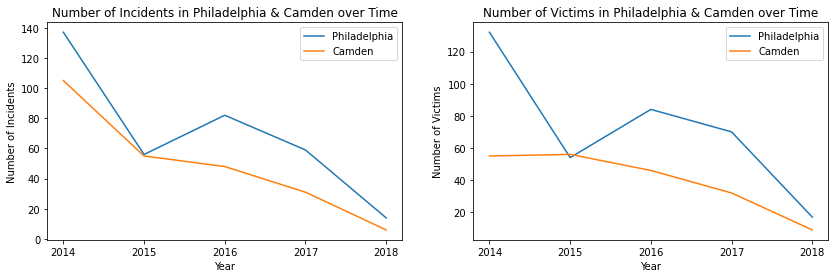

In [17]:
# Visualization #1 (numerical year):
# Comparing number of Gun Violence Incidents & Victims
# Between Philadelphia, PA, and Camden, NJ, over time

phil_camden_sum = phil_camden.groupby(['city_or_county','year']).sum()
phil_camden_sum['num_incidents'] = phil_camden.groupby(['city_or_county', 'year']).count()['incident_id'].values
phil_camden_sum['num_victims'] = phil_camden_sum['n_killed'].values + phil_camden_sum['n_injured'].values

phil = phil_camden_sum.loc['Philadelphia']
camden = phil_camden_sum.loc['Camden']
years = list(phil.index)
num_victims_phil = phil['num_victims'].values
num_incidents_phil = phil['num_incidents'].values
num_victims_camden = camden['num_victims'].values
num_incidents_camden = camden['num_incidents'].values

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 4))
ax1.plot(years, num_incidents_phil, label='Philadelphia')
ax1.plot(years, num_incidents_camden, label='Camden')
ax1.set_title('Number of Incidents in Philadelphia & Camden over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incidents')
ax1.set_xticks(years)
ax1.legend()

ax2.plot(years, num_victims_phil, label='Philadelphia')
ax2.plot(years, num_victims_camden, label='Camden')
ax2.set_title('Number of Victims in Philadelphia & Camden over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Victims')
ax2.set_xticks(years)
ax2.legend();

After edging our research area down to number of victimes and incidents in both Philadelphia (treatment group) and Camden (control group), we were able to find that there has been similar trend in a shape of fall, then rise, and then falling movement in Philadelphia. This demonstrates that after the in-statement of Act of 192 in Pennsylvania, there has been, ironically, a remarkable decrease in number of incidents and victims from gun violence, within Philadelphia. This was a natural outcome as number of victims will be evidently less as the number of incidents goes down. This demonstrates that the in-actment of Act of 192 had a positive relation to decreasing the frequency of gun misusage. The decrease in number of incident is remarkable after 2014 as it dropped from around 140 to 60 from 2014 to 2015. In case of Camden, which free from the Act of 192 also demonstrated decreasing trend in the number of gun-violence incidents from around 110 to 60 over 1-year period. However, the number of victims did not show any changes during that period. Overall, both Camden and Philadelphia have demonstrated decreasing number of gun-violence cases and victims over the 4-year period from our data sets. However, the amount of decrease has varied for both cities as the number of cases and victims have slightly increased in Philadelphia from 2015 to 2016, while the numbers of continuously gone down in Camden. We assume that the increasing number and strictness within gun-control policy has caused overall number of cases and victims to go down throughout the entire nation, but as one can see, the act of 192 seemed to had some correlation to the bounce back of number of gun-violence cases in Philadelphia. The difference between Philadelphia and Camden was the presence of Act of 192, and we support our assumption as reasonable because Act of 192 gave an opportunity for gun advocacy organizations to challenge legislative power on gun-control (Pennsylvania). This may have potentially let to out-break in spread of guns in the wrong hands. 

This is related to our question regarding whether there are less casualities over time. In this case, the data from Philadelphia and Camden seems to suggest this. However, we need further analysis to determine why and if there is a causation (whether due to policy or another variable).

In [18]:
phil_camden_sum.loc[["Camden", "Philadelphia"]][['num_incidents', 'num_victims']]

num_incidents  num_victims
city_or_county year                            
Camden         2014            105           55
               2015             55           56
               2016             48           46
               2017             31           32
               2018              6            9
Philadelphia   2014            137          132
               2015             56           54
               2016             82           84
               2017             59           70
               2018             14           17

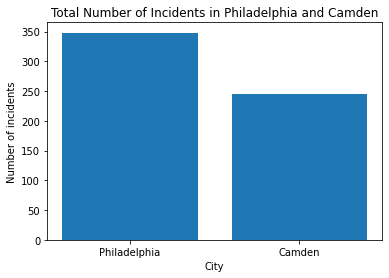

In [19]:
# Visualization #2 (categorical city):
# Total number of Gun Violence Incidents between Philadelphia & Camden.

total_incidents_phil = phil['num_incidents'].sum()
total_incidents_camden = camden['num_incidents'].sum()

plt.bar(['Philadelphia', 'Camden'], [total_incidents_phil, total_incidents_camden])
plt.xlabel('City')
plt.ylabel('Number of incidents')
plt.title('Total Number of Incidents in Philadelphia and Camden')
plt.show();

From a bigger point-of-view, there were (overall) greater number of gun-violence incidents in Philadelphia compared to the number in Camden. This aligns with our analysis from the previous visualization that the Act of 192 potentially had correlation to a higher frequency of incidents in Philadelphia. 

This relates to our causal inference question on whether gun control policy increases or decreases gun violence on a very broad scale. This gives us a preliminary insight on this relationship using the two cities as an example of a treatment and control group (controlled for other factors). It seems that the total number of incidents are greater for the city of Philadelphia, but not by much. Further analysis is needed to see if the Act of 192 really decreased gun violence.

In [20]:
total = phil_camden_sum.groupby(level="city_or_county").sum()
total.loc[["Camden", "Philadelphia"]][['num_incidents']]

,num_incidents
city_or_county,
Camden,245
Philadelphia,348


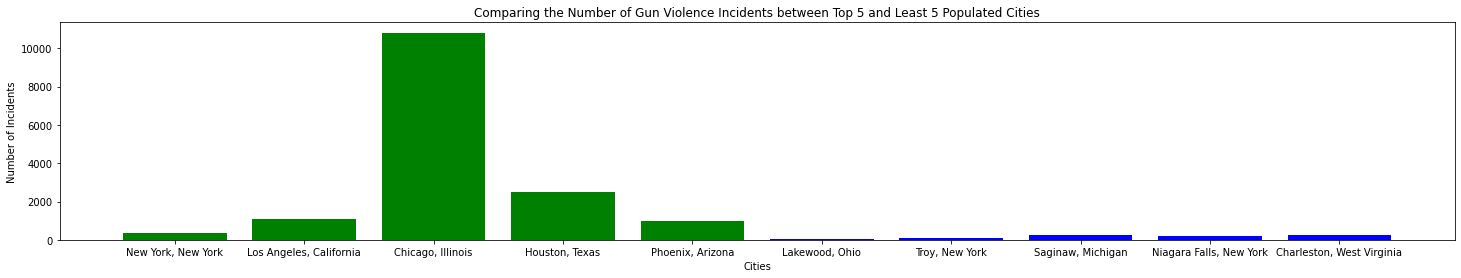

In [21]:
# Visualization #3 (categorical city):
# Bar graph of Number of Gun Violence Incidents from
# top 5 MOST populated to top 5 LEAST populated cities
# (rank of city populations are pulled from 'city_pop_df')

most_5 = city_pop_df.iloc[:5]
most_5_cities = most_5[['city_or_county', 'state']].values
least_5 = city_pop_df.iloc[-5:]
least_5_cities = least_5[['city_or_county', 'state']].values
locations = most_5_cities.tolist()+least_5_cities.tolist()

most_least_cities_df = clean_df.groupby(['city_or_county', 'state']).sum()
most_least_cities_df['num_incidents'] = clean_df.groupby(['city_or_county', 'state']).count()['incident_id'].values

num_incidents_locations = []
for i in locations:
  num_incidents_locations.append(most_least_cities_df.loc[(i[0], i[1])]['num_incidents'])

city_state = []
pairing = []
for i in locations:
  pairing.append(tuple([i[0], i[1]]))
  pair = ", ".join(i)
  city_state.append(pair)

plt.figure(figsize=(25, 4))
plt.bar(city_state, num_incidents_locations, color=['green', 'green', 'green', 'green', 'green', 
                                                    'blue', 'blue', 'blue', 'blue', 'blue'])
plt.xlabel('Cities')
plt.ylabel('Number of Incidents')
plt.title('Comparing the Number of Gun Violence Incidents between Top 5 and Least 5 Populated Cities')
plt.show();

The top 5 cities with highest population (ranked highest from left to right) are marked with green bars, while the top 5 cities with lowest population (ranked lowest from left to right) are marked with blue bars. From the visualization #3, it demonstrates a stark difference between the number of incidents between the top 5 populated cities and least 5 populated cities. This was a reasonable outcome as force of regulation is weaker for cities with greater populations. However, we discovered an interesting finding as the city of Chicago demonstrated exceptionally higher number of gun-violence case reports compared to the other 4 of the most populated cities in the United States. Chicago isn't the most populated city in US as the top 5 most populated cities are ranked from New York, Los Angelas, Chicago, Houston, and Phoenix. It was unexpected to find that Chicago (the third most populated city) was exponentially outnumbering the gun-violence incidents from cities that were more heavily populated than Chicago. Another unexpected founding was that the cities (from top 5 cities) that were less populated than New York and Los Angelas had more case reports on gun-violences. There are multiple confounding variables to discover the causal-relationship between the gun-violence and population, but reporter Lakeidra Chavis has affiliated dozens of gang affiliated residential population ratio in Chicago for the cause of gun-violence (Chavis). On the other hand, the finding that we found from observing the gun-violance incidents from the least populated cities was more on the reasonable level. The lowest 2 cities from the lowest number of populations were Lakewood and Troy. 

This relates to our question of whether more populated cities are associated with more instances or deadlier instances of gun violence. Before we look at correlations, we can take a look at the top 5 and least 5 populated cities as a whole, and it seems to suggest that there seems to somewhat be a difference between populated and unpopulated cities (but of course, this is on a very broad scale).

In [22]:
most_least_cities_df.loc[(i for i in pairing)][['num_incidents']]

,,num_incidents
city_or_county,state,
New York,New York,377
Los Angeles,California,1066
Chicago,Illinois,10814
Houston,Texas,2480
Phoenix,Arizona,969
Lakewood,Ohio,28
Troy,New York,90
Saginaw,Michigan,241
Niagara Falls,New York,182


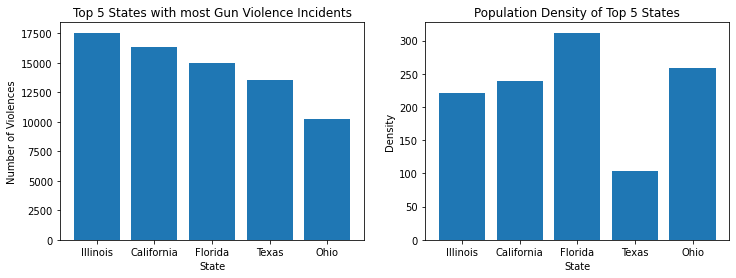

In [23]:
# Visualization #4 (numerical population density):
# Bar graph of top 5 states with highest number of gun incidents
# alongside their population density
state_groups = clean_df.groupby('state').count()
state_density = clean_df.groupby('state').mean()
incidents_by_state = list(zip(state_groups.index, state_groups['incident_id'].values))
incidents_by_state.sort(key = lambda x: x[1], reverse=True)

top_5_states = list(i[0] for i in incidents_by_state[:5])
top_5_incidents = list(i[1] for i in incidents_by_state[:5])
top_5_pop = list(state_density.loc[i]['pop_density'] for i in top_5_states)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 4))
ax1.bar(top_5_states, top_5_incidents)
ax1.set_title('Top 5 States with most Gun Violence Incidents')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Violences')

ax2.bar(top_5_states, top_5_pop)
ax2.set_title('Population Density of Top 5 States')
ax2.set_xlabel('State')
ax2.set_ylabel('Density');

The visualization #4 is a variation of analysis made on visualization #3 that there is uncertainty on correlation between strictness in legislative force and gun-violence controll. This is well demonstrated from the two histograms represented above. Illinois (as it was shown from visualization #3) continues to have the highest number of incidents, despite being 3rd highest population density out of the top 5 states with highest population density. Similarly, California was the second most city with the highest number of gun violence. California was ranked third highest state with highest population density. 

We wanted to relate population density to our question of how properties of a location (particularly states or cities and in this case, states) pertain to gun violence. Here, although we take a look at the top 5 gun violence incident states, we see it does not represent the most densely populated states. This preliminarily suggests that population density is not the (biggest) contributing factor to gun violence.

In [24]:
state_density_and_incidents = state_density.loc[top_5_states][['pop_density']]
state_density_and_incidents['num_incidents'] = top_5_incidents
state_density_and_incidents

,pop_density,num_incidents
state,,
Illinois,221.393517,17556
California,238.589069,16306
Florida,311.913044,15029
Texas,103.138129,13577
Ohio,259.493494,10244


In [ ]:
# Useful function for later
def parse_age(age_string):
	ages = []
	for age in age_string.split('||'):
		ages.append(int(age.split('::')[-1]))

	return np.mean(ages)

# Test
#ages_demo = '0::15||1::29'
#parse_age(ages_demo)

**Citation**
*   Chavis, L. (2021, August 31). The problems with Chicago's gang-centric narrative of gun violence. Injustice Watch. Retrieved April 25, 2022, from https://www.injusticewatch.org/news/police-and-prosecutors/2021/chicago-gun-violence-gang-narrative/ 
*   Pennsylvania Supreme Court affirms Commonwealth Court's decision in leach v. commonwealth declaring act 192 unconstitutional - municipal law update. Lamb McErlane PC. (2016, July 14). Retrieved April 25, 2022, from https://www.lambmcerlane.com/news/pennsylvania-supreme-court-affirms-commonwealth-courts-decision-leach-v-commonwealth-declaring-act-192-unconstitutional-municipal-law-update/




In [28]:
# More cleaning to `clean_df` to shrink size 
# (dropping columns that won't be useful for our project)
# Removed 'incident_url', 'source_url', 'incident_url_fields_missing', 
# 'incident_characteristics', 'notes', 'participant_name', 'participant_relationship', 'sources'
final_clean_df = clean_df.drop(columns=['incident_url', 'source_url', 'incident_url_fields_missing', 
                           'incident_characteristics', 'notes', 'participant_name', 
                           'participant_relationship', 'sources'])
final_clean_df.to_csv('gun_violence.csv')

In [29]:
# Exporting Gun Violence Incidents in Philadelphia, PA & Camden, NJ
phil_camden.to_csv('philadelphia_camden_gun_violence.csv')